# <font color='blue'> <center>  Section 1  -  Problem Statement

# <center> House Price Prediction of Urban and Rural Areas in King County, Washington!
    
We have been given the dataset containing the price of houses which were sold between May 2014 to May 2015 in King County Area of Washington State. Our problem statement consists of predicitng the house prices for rural and urban regions in the Area. Also, the definition of rural and urban regions has been taken basis population density and is clarified in the data pre-processing steps.

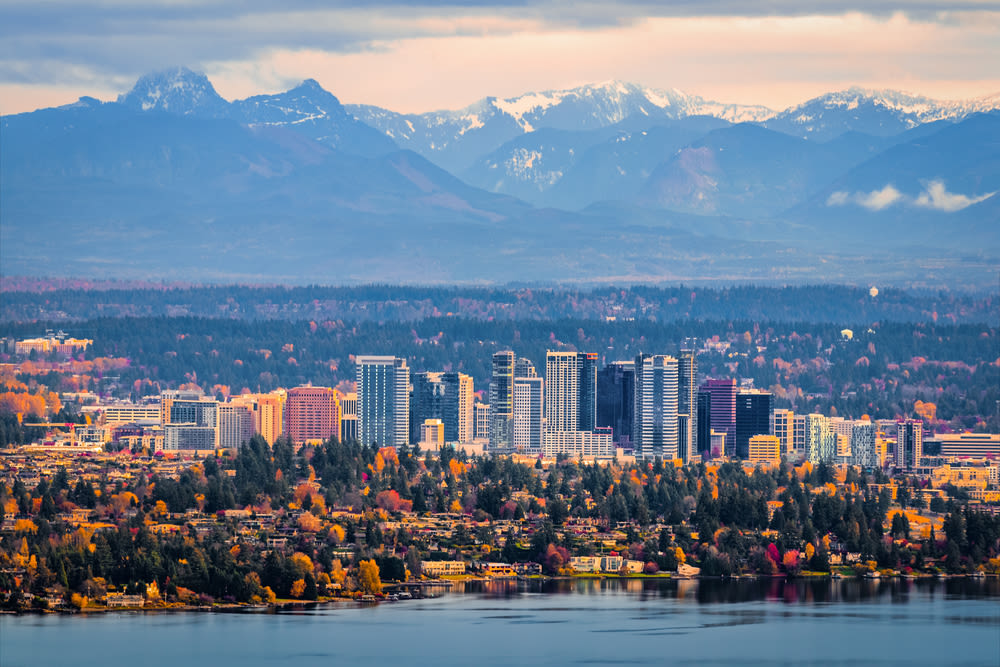

# <font color='blue'> <center>  Section 2  -  Data Source and Description
    

The data in the King County House prices was collected from the Houses sold in the time period of May 2014 to May 2015, and it comprises of 23 different features. The different columns in the dataset are as follows:

Id - Unique ID for each house sold

Date - Date of the house sale

Price - Price of each house sold

Bedrooms - Number of bedrooms in the House

Bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

sqft_living - Square foot area of the apartment's interior living space.

sqft_lot - Square foot area of the land space.

floors - Number of floors

waterfront - A categorical variable for whether the apartment was overlooking the waterfront or not.

view - An index from 0 to 4 of how good the view of the property was.

condition - An index from 1 to 5 on the condition of the House.

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level.

sqft_basement - The square footage of the interior housing space that is below ground level.

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is located in

lat - Lattitude

long - Longitude

sqft_living15 - The square foot area of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square foot area of the land lots of the nearest 15 neighbors


* Source of the Dataset -   https://www.kaggle.com/datasets/shivachandel/kc-house-data

## Importing the required libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

tf.keras.backend.clear_session()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Loading the dataset

In [3]:
df_kc = pd.read_csv('kc_house_data.csv')
print(df_kc.shape)
display(df_kc.head())

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# <font color='blue'> <center>  Section 3  -  Major Findings
    
* In the subsequent sections, we have found that building a Neural Network has outperformed the traditional machine learning algorithm of Linear Regression and Polynomial Regression. We have observed an improved performance in each of the cases - urban as well as rural regions in terms of improved r2 scores. 
    

# <font color='blue'> <center>  Section 4  -  Data Pre-processing Steps 

We have extracted meaningful information from the predictorsby follwoing the below steps:-

1. Calculating age of house with the help of year built and year sold.
2. Converting yr renovated to categorical variable -  1 if it was renovated else 0. 
    
3. Extracting population, population density per sq mile, median household income and land area per sq mile from the zipcodes which is one of the predictors. Site used to extract this information  -  https://www.unitedstateszipcodes.org/
4. Divinding the region into Urban and Rural Areas basis median population density - 2253. Source - https://www.stockingblue.com/article/1007/us-cities-by-population-density-of-urban-area/
5. Standardizing the data (for continuous variables)  -  Initially we separated the dataset into two different dataframes basis categorical and continous nature and after standardizing the continuosus dataframe, we combined the two again.
6. This final combination has been used for building models for urban and rural regions separately.
7. We have progressively built the models in the following order - Linear Regression <  Polynomial Regression < Neural Networks

### Calculating age of house at the time of sale

In [5]:
df_kc['date'] = pd.to_datetime(df_kc['date'])
df_kc['year_sold'] = pd.to_datetime(df_kc['date']).dt.year

df_kc['Age_of_house'] = df_kc['year_sold']-df_kc['yr_built']
df_kc.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_of_house
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


#### Here we have extracted information from two columns  - 'Date' which consists of year when house was sold and 'yr_built' signifying the year in which house was built

In [6]:
df_kc[df_kc.columns[1:]].corr()['price'][:]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
year_sold        0.003576
Age_of_house    -0.053951
Name: price, dtype: float64

#### As we can see Age of house is negatively correlated with the response varibale which makes sense if we take into account the depriciation of house with time

### Making yr renovated a categroical column

In [24]:
df_kc.yr_renovated[df_kc.yr_renovated !=0] =1
df_kc.yr_renovated.max()
df_kc['yr_renovated'].value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

### Extracting Meaningful information from  Zipcode and adding predictors which could be important for model building


In [25]:
df_kc['zipcode'].nunique()

70

#### There are 70 unique zipcodes in our zipcode column. For each of this pincode we have got the information about population, population density, median household income and land area from the webisite www.unitedstateszipcodes.org

In [26]:
df = pd.DataFrame(df_kc['zipcode'].unique(), columns=['Zipcode'])

# saving the dataframe
#df.to_csv('file1.csv')

In [27]:
df_1 = pd.read_csv('file1.csv')

### Fetching information of population density and land area zipcode wise

Source- https://www.unitedstateszipcodes.org

In [28]:
df_1.head()

,zipcode,Population,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
0,98178,24092,4966,58707,4.85
1,98125,37081,6879,53044,5.39
2,98028,20419,3606,82448,5.66
3,98136,14770,6425,84344,2.30
4,98074,24748,2411,143686,10.68


In [29]:
##combining the data frames basis 'zipcode'
df_merged = pd.merge(df_kc, df_1, on= 'zipcode')
print(df_merged.shape)
print(df_merged.columns)

(21613, 27)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold',
       'Age_of_house', 'Population ', 'Population_density_per_sq_mile',
       'Median_Household_Income', 'Land_Area_sq_mile'],
      dtype='object')


In [30]:
df_new = df_merged.drop(['id', 'date', 'yr_built', 'zipcode', 'lat', 'long', 'year_sold', 'Population '], axis=1)
print(df_new.shape)
df_new.head()

(21613, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59,4966,58707,4.85
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,0,1190,6780,69,4966,58707,4.85
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,0,2660,8712,47,4966,58707,4.85
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,0,1320,7619,53,4966,58707,4.85
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,0,1650,8775,84,4966,58707,4.85


## EDA 

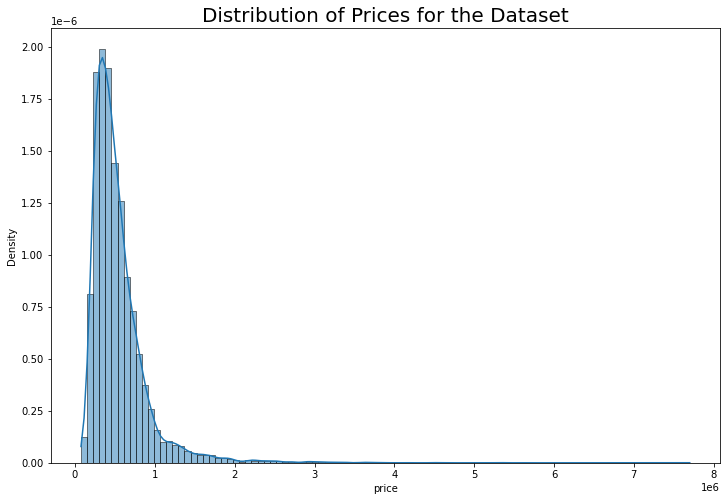

In [388]:
# plotting a distribution of prices for the dataset.

plt.figure(figsize=(12,8))

sns.histplot(x = 'price', data=df_new, bins=100, ec='k', lw=0.5, stat = 'density', kde=True)
plt.title("Distribution of Prices for the Dataset", size=20)
plt.show()

#### The plot shows that the distribution of the price is more in the lower range and a very small count in comparitively higher price ranges.

### Correlation Among Variables

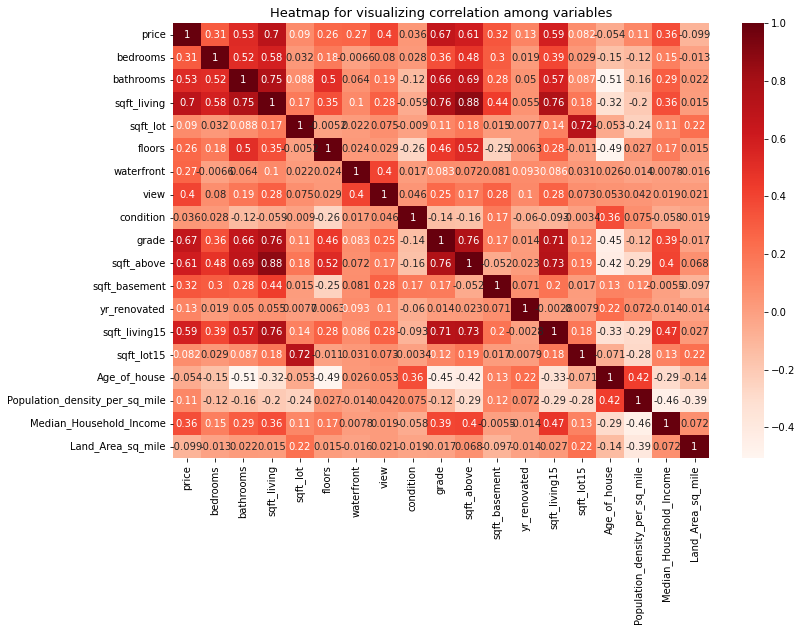

In [390]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap for visualizing correlation among variables',
         fontsize=13)
plt.show()

### Correlation of the predictor variables with the response variable.

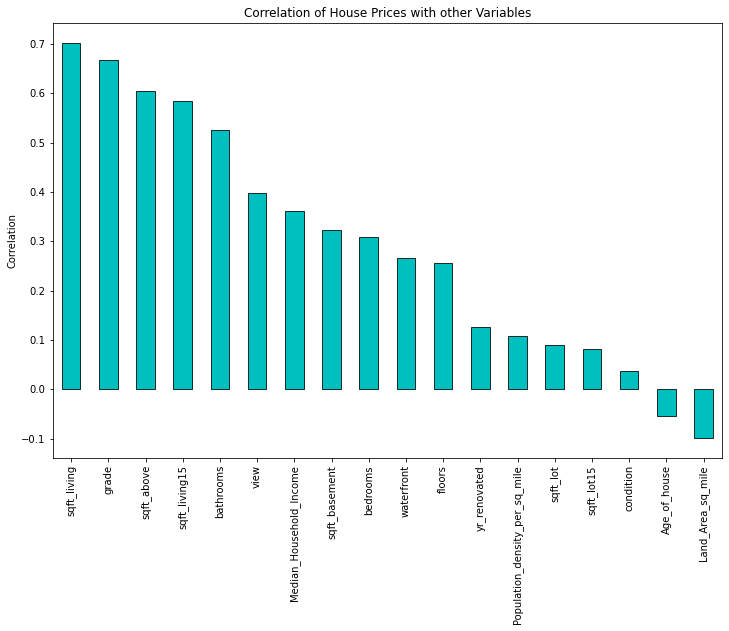

In [389]:
df_new.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar', figsize=(12,8), ec= 'k', lw ='0.8', color = 'c')
plt.title("Correlation of House Prices with other Variables")
plt.ylabel("Correlation")
plt.show()

#### Here we plotted the correlation of all the variables with the response variable price, which suggests a huge correlation with certain variables such as sqft_living, while some of which are negatively correlated as well such as age of a house, intuitively it makes sense that as the age of the house is incresing, the depreciation factor comes into play hence the price is reducing.

### Division of Rural and Urban Regions
* Dividing the dataframe for rural and urban regions basis median population desnity threshold for an avg american city - 2253

## Rural Region

In [74]:
rural_df = df_new[df_new['Population_density_per_sq_mile']<2253]
print(rural_df.shape)
rural_df.head()

(5974, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
1659,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,0,4760,101930,13,662,116518,28.37
1660,861990.0,5,2.75,3595,5639,2.0,0,0,3,9,3595,0,0,3625,5639,0,662,116518,28.37
1661,479950.0,2,2.00,1510,6516,1.0,0,0,3,8,1510,0,0,1640,6009,10,662,116518,28.37
1662,516500.0,3,2.50,1480,4729,2.0,0,0,3,7,1480,0,0,2250,4729,11,662,116518,28.37
1663,780000.0,4,2.50,3500,7048,2.0,0,0,3,9,3500,0,0,3920,7864,9,662,116518,28.37


## Urban Region

In [75]:
urban_df = df_new[df_new['Population_density_per_sq_mile']>2253]
print(urban_df.shape)
urban_df.head()

(15639, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59,4966,58707,4.85
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,0,1190,6780,69,4966,58707,4.85
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,0,2660,8712,47,4966,58707,4.85
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,0,1320,7619,53,4966,58707,4.85
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,0,1650,8775,84,4966,58707,4.85


### Standardizing the data 
* First, separate the dataset by categorical and ontinuous variables and followed by standardizing the continuous columns and then combining them again.

### For Rural Region

In [112]:
X_con = rural_df.drop(['waterfront', 'view', 'condition', 'grade', 'yr_renovated'], axis =1) 
X_cat  = rural_df[['waterfront', 'view', 'condition', 'grade', 'yr_renovated']]

y = rural_df[['price']]

In [115]:
X_cat = X_cat.reset_index(drop = True)

In [117]:
scale = StandardScaler()
X = scale.fit_transform(X_con)
y = scale.fit_transform(y)

In [118]:
X.shape , y.shape, X_cat.shape

((5974, 14), (5974, 1), (5974, 5))

In [119]:
#col = list(X_con.columns)[:]
X = pd.DataFrame(X, columns = pd.DataFrame(X_con).columns)
y = pd.DataFrame(y, columns = ['price'])

In [121]:
rural_std_df = pd.concat([X, X_cat], axis=1)
display(rural_std_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile,waterfront,view,condition,grade,yr_renovated
0,2.398210,0.696101,3.148249,3.306829,0.936007,-1.184722,1.976651,3.521719,3.501739,1.569643,-0.719198,-0.497594,0.905194,-0.354454,0,0,3,11,0
1,1.231626,1.953208,0.671325,1.381585,-0.357041,0.849635,1.648782,-0.451442,1.944694,-0.412108,-1.349757,-0.497594,0.905194,-0.354454,0,0,3,9,0
2,0.003886,-1.818113,-0.390214,-0.817941,-0.345265,-1.184722,-0.668529,-0.451442,-0.778420,-0.404493,-0.864711,-0.497594,0.905194,-0.354454,0,0,3,8,0
3,0.121344,-0.561006,0.317478,-0.849589,-0.369261,0.849635,-0.701872,-0.451442,0.058406,-0.430836,-0.816207,-0.497594,0.905194,-0.354454,0,0,3,7,0
4,0.968139,0.696101,0.317478,1.281367,-0.338121,0.849635,1.543197,-0.451442,2.349388,-0.366315,-0.913216,-0.497594,0.905194,-0.354454,0,0,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,7.202607,0.696101,1.379018,1.798281,-0.189507,0.849635,2.087793,-0.451442,1.704621,-0.197079,-0.137143,1.378791,3.843551,-0.646330,0,0,4,11,0
5970,4.728102,0.696101,1.732864,1.877401,-0.181477,0.849635,2.171150,-0.451442,1.183319,-0.143034,-0.040134,1.378791,3.843551,-0.646330,0,0,4,10,0
5971,5.692195,1.953208,4.209788,1.186423,-0.323752,0.849635,1.443169,-0.451442,1.649747,-0.194013,-0.913216,1.378791,3.843551,-0.646330,0,0,3,11,0
5972,7.781063,1.953208,2.440557,3.064195,-0.236708,0.849635,3.421498,-0.451442,2.239641,-0.131982,-1.301253,1.378791,3.843551,-0.646330,0,1,3,11,0


### For Urban Region

In [122]:
X_con = urban_df.drop(['waterfront', 'view', 'condition', 'grade', 'yr_renovated'], axis =1) 
X_cat  = urban_df[['waterfront', 'view', 'condition', 'grade', 'yr_renovated']]

y = urban_df[['price']]

In [123]:
X_cat = X_cat.reset_index(drop = True)

In [124]:
scale = StandardScaler()
X = scale.fit_transform(X_con)
y = scale.fit_transform(y)

In [125]:
#col = list(X_con.columns)[:]
X = pd.DataFrame(X, columns = pd.DataFrame(X_con).columns)
y = pd.DataFrame(y, columns = ['price'])

urban_std_df = pd.concat([X, X_cat], axis=1, join='inner')
display(urban_std_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile,waterfront,view,condition,grade,yr_renovated
0,-0.890158,-0.350792,-1.342724,-0.918275,-0.294925,-0.832024,-0.634994,-0.739997,-0.867003,-0.343982,0.324875,-0.230132,-0.754283,-0.550837,0,0,3,7,0
1,-0.933087,-1.376410,-1.342724,-1.253650,-0.180680,-0.832024,-1.027805,-0.739997,-1.098335,-0.166727,0.657570,-0.230132,-0.754283,-0.550837,0,0,4,6,0
2,-0.308831,-0.350792,0.250779,0.110206,-0.037016,-0.832024,-0.058871,0.315707,1.168720,0.136333,-0.074359,-0.230132,-0.754283,-0.550837,0,2,3,8,0
3,-0.853418,-0.350792,-1.342724,-0.784126,-0.269851,-0.832024,-0.477870,-0.739997,-0.897847,-0.035118,0.125258,-0.230132,-0.754283,-0.550837,0,0,3,7,0
4,-1.025393,-1.376410,-1.342724,-1.276008,-0.333848,-0.832024,-1.053993,-0.739997,-0.388916,0.146215,1.156613,-0.230132,-0.754283,-0.550837,0,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15634,0.118500,0.674827,1.844281,2.223064,0.273263,0.974073,1.656403,1.591349,0.120014,0.546687,-1.371870,-0.382633,-0.406037,-0.570370,0,3,3,9,0
15635,-0.224147,1.700445,1.844281,0.909515,-0.298059,0.974073,1.505826,-0.739997,1.049969,-0.399668,-1.538218,-0.382633,-0.406037,-0.570370,0,0,3,9,0
15636,-0.426087,0.674827,0.569479,0.443345,-0.260752,0.974073,0.959819,-0.739997,0.721478,-0.290962,-1.438409,-0.382633,-0.406037,-0.570370,0,0,3,8,0
15637,-0.686655,0.674827,0.569479,-0.097726,-0.535343,0.974073,0.326083,-0.739997,-0.290215,-0.720454,-1.471679,-0.382633,-0.406037,-0.570370,0,0,3,8,0


### Now after the standardization, we have two separate dataframes for rural as well as urban region
* Rural  -  rural_std_df
* Urban -  urban_std_df

# <font color='blue'> <center>  Section 5  -  Models 

* Linear Regression  -  Since it is a prediction problem, we began the first level of analysis by incorporating Linear Regression model to see the performance.
    
* Polynomial Regression -  After checking the assumption of linearlity which does not hold in our analysis, we imporved the model peroformance by applying Polynommial Regression.
    
* Neural Network -  In order to further improve the model performances, a deep neural network was employed and a comparision of perofrmances by applying differnt models was made.

## Linear Regression  -  Rural Region

In [136]:
X_rural = rural_std_df.drop(['price'], axis =1)
y_rural = rural_std_df['price']

print(X_rural.shape , y_rural.shape)

(5974, 18) (5974,)


In [137]:
x_train, x_test , y_train , y_test  =  train_test_split(X_rural,y_rural, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4480, 18) (1494, 18)
(4480,) (1494,)


In [138]:
# Building a simple linear regression model initially.

model = LinearRegression()

model.fit(x_train, y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Computing the train and test MSE values.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}')

MSE for training data 0.2489
MSE for testing data 0.2858


In [118]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, model.coef_[idcoff]))

The coefficient for bedrooms is -0.0960071540650564
The coefficient for bathrooms is 0.14439006286133635
The coefficient for sqft_living is 0.2475422285280018
The coefficient for sqft_lot is 0.06638528252223848
The coefficient for floors is -0.11778138124773967
The coefficient for sqft_above is 0.2532982604810822
The coefficient for sqft_basement is 0.017523788657317334
The coefficient for sqft_living15 is -0.018764326671080158
The coefficient for sqft_lot15 is 0.007423942019266053
The coefficient for Age_of_house is 0.07802825319152426
The coefficient for Population_density_per_sq_mile is 0.04527220394091674
The coefficient for Median_Household_Income is 0.35334763132028085
The coefficient for Land_Area_sq_mile is 0.030509589491089225
The coefficient for waterfront is 1.5748302165003312
The coefficient for view is 0.09857730788724475
The coefficient for condition is 0.05516568951310337
The coefficient for grade is 0.1618583606748905
The coefficient for yr_renovated is 0.12331779818083

In [119]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.4815411518135522


In [139]:
# Also calculating the R-squared values.

r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

R2 score for training data 0.7486
R2 score for testing data 0.7225


## L1 Regularizer - Rural Region

In [122]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))


0.7342113949411516
0.7116409394774244


In [123]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, lasso.coef_[idcoff]))

The coefficient for bedrooms is -0.0838011384271716
The coefficient for bathrooms is 0.12090167372767949
The coefficient for sqft_living is 0.30842837025101855
The coefficient for sqft_lot is 0.05953627254705633
The coefficient for floors is -0.0850767890730826
The coefficient for sqft_above is 0.1617270905410628
The coefficient for sqft_basement is 0.0
The coefficient for sqft_living15 is 0.0
The coefficient for sqft_lot15 is 0.0
The coefficient for Age_of_house is 0.09420271540671793
The coefficient for Population_density_per_sq_mile is 0.01717867173312014
The coefficient for Median_Household_Income is 0.33666437311028985
The coefficient for Land_Area_sq_mile is 0.0
The coefficient for waterfront is 0.0
The coefficient for view is 0.16314268701312334
The coefficient for condition is 0.026610674021849974
The coefficient for grade is 0.16518524783507882
The coefficient for yr_renovated is 0.0


### Checking the assumption of Linearity among variables

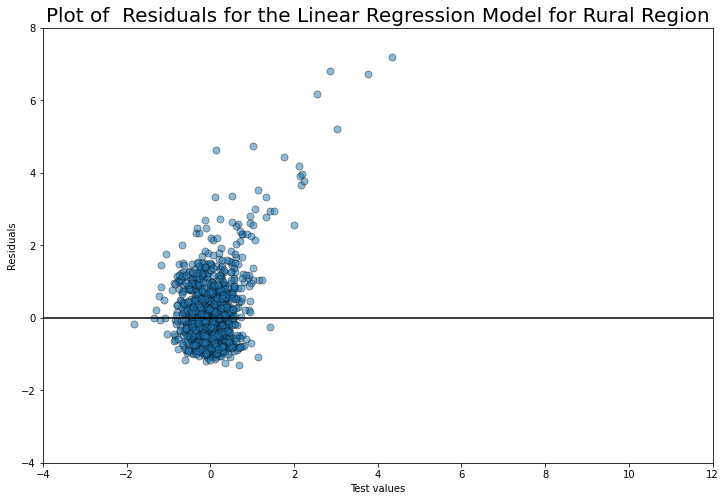

In [141]:
# Plotting the residuals for the linear model against the test values -  Rural Region 

residuals = y_test - ypred_test

plt.figure(figsize=(12,8))
plt.scatter(residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')

plt.ylim(-4,8)
plt.xlim(-4,12)
plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Linear Regression Model for Rural Region", size=20)
plt.show()

### Since a uniform distrubution of residuals is missnig in the plot, hence we can conclude that the linearity assumption is not holding.

## Polynomial Regression - Rural Region 

### Fitting the Polynomial Regression

In [154]:
# Calculating the polynomial features with the degree- 2 obtained.

x_poly_train = PolynomialFeatures(2).fit_transform(x_train)
x_poly_test = PolynomialFeatures(2).fit_transform(x_test)

# Fitting the data to a multiple polynomial regression model.

model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_poly_train, y_train)

y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

# Calculating the test and train MSE for the fitted model.

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

# Also finding the R-squared value for test and train data.

r2score_train  = r2_score(y_train, y_pred_train)
r2score_test = r2_score(y_test, y_pred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.1099
MSE for testing data 0.1808

R2 score for training data 0.8890
R2 score for testing data 0.8244


### Inferences:

Polynomial model was a great improvement on previous models, as the MSE was lowered significantly and the R-squared for test data increased upto approx. 0.82.

### Residual Plot

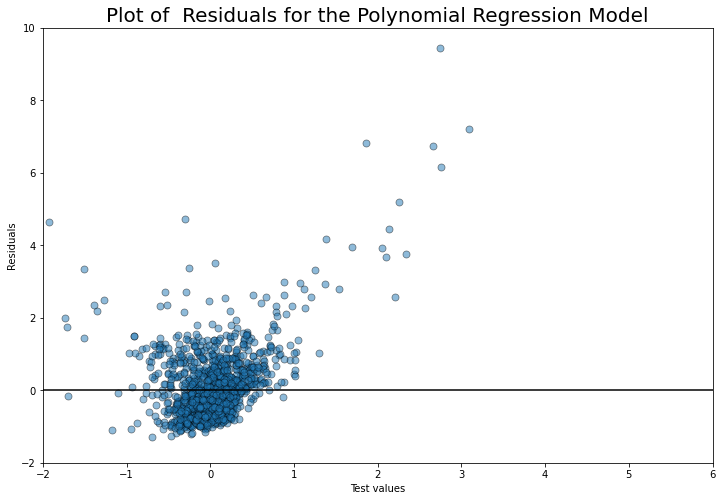

In [156]:
# Again plotting the residuals for the polynomial model.

Poly_residuals = y_test - y_pred_test

plt.figure(figsize=(12,8))
plt.scatter(Poly_residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')
plt.ylim(-2, 10)
plt.xlim(-2, 6)

plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Polynomial Regression Model", size=20)
plt.show()

### Inference
A residual plot for the polynomial model showed a comparitively more random distribution than last time but it wasnt uniformly distributed. This could be due to still some non-linear features in the data which the model doesnt account for properly.

## Linear Regression  -  Urban Region

In [157]:
X_urban = urban_std_df.drop(['price'], axis =1)
y_urban = urban_std_df['price']

print(X_urban.shape , y_urban.shape)

(15639, 18) (15639,)


In [158]:
x_train, x_test , y_train , y_test  =  train_test_split(X_urban,y_urban, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11729, 18) (3910, 18)
(11729,) (3910,)


In [159]:
# Building a simple linear regression model initially.

model = LinearRegression()

model.fit(x_train, y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Computing the train and test MSE values.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}')

MSE for training data 0.2533
MSE for testing data 0.3206


In [128]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, model.coef_[idcoff]))

The coefficient for bedrooms is -0.065727047023752
The coefficient for bathrooms is 0.03638404782127036
The coefficient for sqft_living is 0.22313609761583322
The coefficient for sqft_lot is -0.008925477447142222
The coefficient for floors is -0.0323805495307906
The coefficient for sqft_above is 0.22359168152005365
The coefficient for sqft_basement is 0.06342476010772591
The coefficient for sqft_living15 is 0.08169900683945445
The coefficient for sqft_lot15 is -0.0027801550554376326
The coefficient for Age_of_house is 0.14239709157267927
The coefficient for Population_density_per_sq_mile is 0.17985931971732094
The coefficient for Median_Household_Income is 0.20513127930771138
The coefficient for Land_Area_sq_mile is -0.0721727571120443
The coefficient for waterfront is 1.7103196854477816
The coefficient for view is 0.104872874339034
The coefficient for condition is 0.06843481480714736
The coefficient for grade is 0.22495308139350811
The coefficient for yr_renovated is 0.093489611796586

In [160]:
# Also calculating the R-squared values.

r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

R2 score for training data 0.7338
R2 score for testing data 0.7198


## L1 Regularizer - Urban Region

In [130]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))


0.7167450322188851
0.6968324618518117


In [131]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, lasso.coef_[idcoff]))

The coefficient for bedrooms is -0.0458468419488169
The coefficient for bathrooms is 0.012533526999261713
The coefficient for sqft_living is 0.3681291775384781
The coefficient for sqft_lot is 0.0
The coefficient for floors is -0.0
The coefficient for sqft_above is 0.08466219236419058
The coefficient for sqft_basement is 0.0
The coefficient for sqft_living15 is 0.07137432562170232
The coefficient for sqft_lot15 is 0.0
The coefficient for Age_of_house is 0.14718653680148963
The coefficient for Population_density_per_sq_mile is 0.16041105894649577
The coefficient for Median_Household_Income is 0.1893876264280163
The coefficient for Land_Area_sq_mile is -0.06103784455231572
The coefficient for waterfront is 0.22423302795832914
The coefficient for view is 0.16358732097412368
The coefficient for condition is 0.04462479427836003
The coefficient for grade is 0.22752832904603354
The coefficient for yr_renovated is 0.0


### Checking the assumption of Linearity among variables

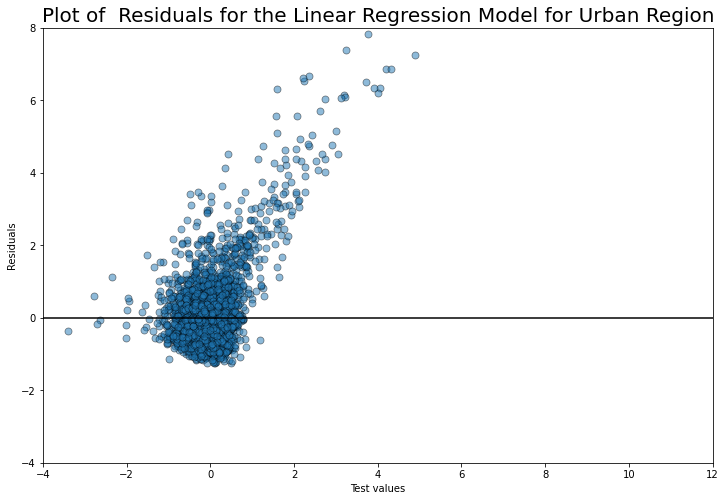

In [162]:
# Plotting the residuals for the linear model against the test values -  Rural Region 

residuals = y_test - ypred_test

plt.figure(figsize=(12,8))
plt.scatter(residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')

plt.ylim(-4,8)
plt.xlim(-4,12)
plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Linear Regression Model for Urban Region", size=20)
plt.show()

### Since a uniform distrubution of residuals is missnig in the plot, hence we can conclude that the linearity assumption is not holding.

## Polynomial Regression - Urban Region 

### Fitting the Polynomial Regression

In [163]:
# Calculating the polynomial features with the degree- 2 obtained.

x_poly_train = PolynomialFeatures(2).fit_transform(x_train)
x_poly_test = PolynomialFeatures(2).fit_transform(x_test)

# Fitting the data to a multiple polynomial regression model.

model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_poly_train, y_train)

y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

# Calculating the test and train MSE for the fitted model.

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

# Also finding the R-squared value for test and train data.

r2score_train  = r2_score(y_train, y_pred_train)
r2score_test = r2_score(y_test, y_pred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.1600
MSE for testing data 0.2103

R2 score for training data 0.8319
R2 score for testing data 0.8162


### Inferences:

Polynomial model was a great improvement on previous models, as the MSE was lowered significantly and the R-squared for test data increased upto approx. 0.81.

### Residual Plot

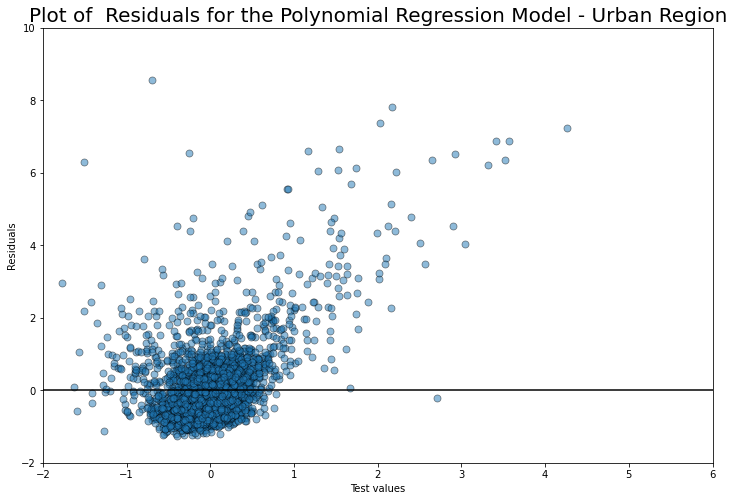

In [165]:
# Again plotting the residuals for the polynomial model.

Poly_residuals = y_test - y_pred_test

plt.figure(figsize=(12,8))
plt.scatter(Poly_residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')
plt.ylim(-2, 10)
plt.xlim(-2, 6)

plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Polynomial Regression Model - Urban Region", size=20)
plt.show()

### Inference

* Although we have found important features for rural and urban regions respectively, however we are not  dropping any further predictors since regularization hasn't helped much in terms of imroving the model performance.

* A residual plot for the polynomial model showed a comparitively more random distribution than last time but it wasnt uniformly distributed. This could be due to still some non-linear features in the data which the model doesnt account for properly.

* As we can see, with linear and polynomial regression, we could only achieve a maximum r2 score of around 0.82. In order to further imporve the performance we will build a neural network architecture for rural and urban regions and then will compare the performances. 



##  Building a Neural Nework Architecture

* The NN architecture has been built by using sequential API of keras wherein the layers will be arranged i sequential order.
* Activation function used - Relu in hidden layer and linear in output layer 
* No of Layers  - 3
* Optimizer used  -  Adam 
* Variant  -  Mini batching GD with btach size 64 


## Deep Leaning Neural Network for Rural Region

In [197]:
X_rural = rural_std_df.drop(['price'], axis =1)
y_rural = rural_std_df['price']

print(X_rural.shape , y_rural.shape)

(5974, 18) (5974,)


In [198]:
x_train, x_test , y_train , y_test  =  train_test_split(X_rural,y_rural, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4480, 18) (1494, 18)
(4480,) (1494,)


In [232]:
#no. of input nodes 
n_input = 18

#no. of nodes in hidden layer 
n_hidden =  100

#no. of nodes in output layer 
n_output = 1


In [288]:
model = keras.Sequential()

#hidden layer 1
model.add(layers.Dense(n_hidden, input_dim = n_input, activation = 'relu', name = 'hidden1'))


#hidden Layer 2
model.add(layers.Dense(60, activation = 'relu', name = 'hidden2'))

#hidden Layer 3
model.add(layers.Dense(20, activation = 'relu', name = 'hidden3'))


#hidden layer 4
# model.add(layers.Dense(5, activation = 'relu', name = 'hidden4'))
# model.add(Dropout(0.2))


#output layer 
model.add(layers.Dense(n_output, activation = 'linear', name = 'output'))


model.compile(
    optimizer =  'adam',
    loss = 'mean_squared_error'
)


loss = tf.keras.losses.MeanSquaredError(reduction = 'sum_over_batch_size')

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               1900      
                                                                 
 hidden2 (Dense)             (None, 60)                6060      
                                                                 
 hidden3 (Dense)             (None, 20)                1220      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 9,201
Trainable params: 9,201
Non-trainable params: 0
_________________________________________________________________


In [289]:
history  =  model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

Epoch 1/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3909 - val_loss: 0.2209
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2512 - val_loss: 0.2410
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2151 - val_loss: 0.2393
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1916 - val_loss: 0.2794
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1806 - val_loss: 0.2568
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.2753
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.2881
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1298 - val_loss: 0.3175
Epoch 9/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1214 - val_loss: 0.3035
Epoch 10/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1184 - val_loss: 0.3432
Epoch 11/

56/56 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.1674
Epoch 84/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.3549
Epoch 85/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.2492
Epoch 86/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0444 - val_loss: 0.2517
Epoch 87/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.2953
Epoch 88/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.2335
Epoch 89/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.3295
Epoch 90/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0306 - val_loss: 0.2237
Epoch 91/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.2431
Epoch 92/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 0.2217
Epoch 93/100


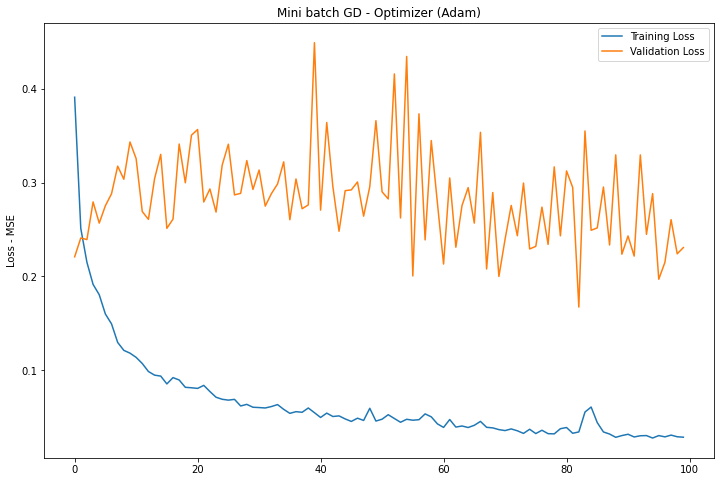

In [290]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylabel('Loss - MSE')
plt.title('Mini batch GD - Optimizer (Adam)')
plt.show()

In [291]:
train_loss =  model.evaluate(x_train,y_train, verbose = 0)
test_loss = model.evaluate(x_test, y_test, verbose = 0)

print(f'Training Loss is {train_loss:.4f}')
print(f'Testing Loss is {test_loss:.4f}')

Training Loss is 0.0668
Testing Loss is 0.1235


In [292]:
train_accuracy = r2_score(y_train, model.predict(x_train))
test_accuracy =  r2_score(y_test, model.predict(x_test))

print(f'Training Accuracy is {train_accuracy:.4f}')
print(f'Testing Accuracy is {test_accuracy:.4f}')

Training Accuracy is 0.9326
Testing Accuracy is 0.8801


## Deep Leaning Neural Network for Urban Region

In [309]:
X_urban = urban_std_df.drop(['price'], axis =1)
y_urban = urban_std_df['price']

print(X_urban.shape , y_urban.shape)

(15639, 18) (15639,)


In [310]:
x_train, x_test , y_train , y_test  =  train_test_split(X_urban,y_urban, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11729, 18) (3910, 18)
(11729,) (3910,)


In [311]:
#no. of input nodes 
n_input = 18

#no. of nodes in hidden layer 
n_hidden =  100

#no. of nodes in output layer 
n_output = 1


In [312]:
model = keras.Sequential()

#hidden layer 1
model.add(layers.Dense(n_hidden, input_dim = n_input, activation = 'relu', name = 'hidden1'))


#hidden Layer 2
model.add(layers.Dense(60, activation = 'relu', name = 'hidden2'))

#hidden Layer 3
model.add(layers.Dense(20, activation = 'relu', name = 'hidden3'))


#hidden layer 4
# model.add(layers.Dense(5, activation = 'relu', name = 'hidden4'))
# model.add(Dropout(0.2))


#output layer 
model.add(layers.Dense(n_output, activation = 'linear', name = 'output'))


model.compile(
    optimizer =  'adam',
    loss = 'mean_squared_error'
)


loss = tf.keras.losses.MeanSquaredError(reduction = 'sum_over_batch_size')

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               1900      
                                                                 
 hidden2 (Dense)             (None, 60)                6060      
                                                                 
 hidden3 (Dense)             (None, 20)                1220      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 9,201
Trainable params: 9,201
Non-trainable params: 0
_________________________________________________________________


In [313]:
history  =  model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 0.3987 - val_loss: 0.3513
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2166 - val_loss: 0.2817
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1927 - val_loss: 0.2665
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1806 - val_loss: 0.2344
Epoch 5/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1667 - val_loss: 0.2346
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.2153
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1539 - val_loss: 0.2132
Epoch 8/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.2233
Epoch 9/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.2079
Epoch 10/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1391 - val_lo

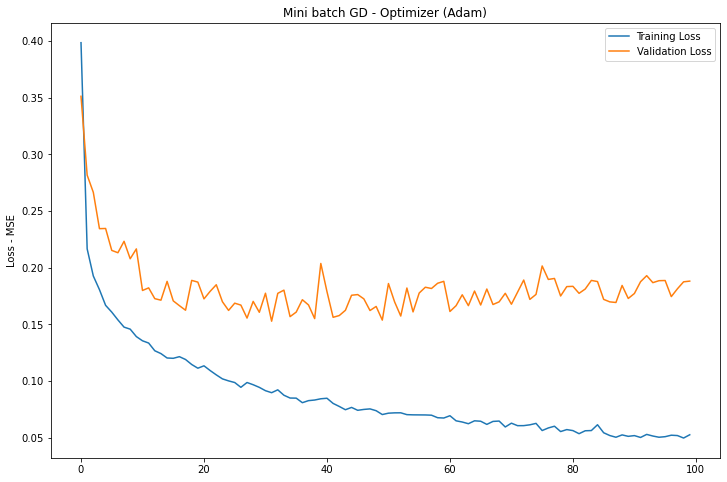

In [314]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylabel('Loss - MSE')
plt.title('Mini batch GD - Optimizer (Adam)')
plt.show()

In [315]:
train_loss =  model.evaluate(x_train,y_train, verbose = 0)
test_loss = model.evaluate(x_test, y_test, verbose = 0)

print(f'Training Loss is {train_loss:.4f}')
print(f'Testing Loss is {test_loss:.4f}')

Training Loss is 0.0764
Testing Loss is 0.1768


In [316]:
train_accuracy = r2_score(y_train, model.predict(x_train))
test_accuracy =  r2_score(y_test, model.predict(x_test))

print(f'Training Accuracy is {train_accuracy:.4f}')
print(f'Testing Accuracy is {test_accuracy:.4f}')

Training Accuracy is 0.9197
Testing Accuracy is 0.8455


## Clubbing both the regions and building a DL Neural Network

In [329]:
X_con = df_new.drop(['waterfront', 'view', 'condition', 'grade', 'yr_renovated'], axis =1) 
X_cat  = df_new[['waterfront', 'view', 'condition', 'grade', 'yr_renovated']]

y = df_new[['price']]

In [330]:
X_cat = X_cat.reset_index(drop = True)

In [331]:
scale = StandardScaler()
X = scale.fit_transform(X_con)
y = scale.fit_transform(y)

In [341]:
#col = list(X_con.columns)[:]
X = pd.DataFrame(X, columns = pd.DataFrame(X_con).columns)
y = pd.DataFrame(y, columns = ['price'])

df_both = pd.concat([X, X_cat], axis=1, join='inner')
display(df_both)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile,waterfront,view,condition,grade,yr_renovated
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.943355,-0.260715,0.533865,0.227111,-0.925297,-0.312377,0,0,3,7,0
1,-0.911594,-1.473959,-1.447464,-1.306483,-0.201040,-0.915427,-1.096995,-0.658681,-1.162213,-0.219329,0.874293,0.227111,-0.925297,-0.312377,0,0,4,6,0
2,-0.259012,-0.398737,0.175607,0.021886,-0.166732,-0.915427,-0.203353,0.425906,0.982596,-0.148569,0.125352,0.227111,-0.925297,-0.312377,0,2,3,8,0
3,-0.828310,-0.398737,-1.447464,-0.849176,-0.222334,-0.915427,-0.589793,-0.658681,-0.972536,-0.188600,0.329608,0.227111,-0.925297,-0.312377,0,0,3,7,0
4,-1.008088,-1.473959,-1.447464,-1.328260,-0.237616,-0.915427,-1.121148,-0.658681,-0.491048,-0.146261,1.384934,0.227111,-0.925297,-0.312377,0,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5.937894,0.676485,1.474063,2.079769,0.072623,0.936506,2.658718,-0.658681,2.135249,0.121543,-0.623589,-0.756473,4.243382,-0.375150,0,0,4,11,0
21609,3.840480,0.676485,1.798677,2.161431,0.087061,0.936506,2.749290,-0.658681,1.580809,0.217721,-0.555504,-0.756473,4.243382,-0.375150,0,0,4,10,0
21610,4.657654,1.751707,4.070975,1.448249,-0.168736,0.936506,1.958295,-0.658681,2.076887,0.127000,-1.168274,-0.756473,4.243382,-0.375150,0,0,3,11,0
21611,6.428198,1.751707,2.447905,3.386361,-0.012240,0.936506,4.107867,-0.658681,2.704281,0.237388,-1.440616,-0.756473,4.243382,-0.375150,0,1,3,11,0


In [344]:
X = df_both.drop(['price'], axis = 1)
y = df_both['price']


x_train, x_test, y_train, y_test  =  train_test_split(X,y, train_size=0.75, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16209, 18) (16209,)
(5404, 18) (5404,)


In [345]:
#no. of input nodes 
n_input = 18

#no. of nodes in hidden layer 
n_hidden =  100

#no. of nodes in output layer 
n_output = 1


In [346]:
model = keras.Sequential()

#hidden layer 1
model.add(layers.Dense(n_hidden, input_dim = n_input, activation = 'relu', name = 'hidden1'))


#hidden Layer 2
model.add(layers.Dense(60, activation = 'relu', name = 'hidden2'))

#hidden Layer 3
model.add(layers.Dense(20, activation = 'relu', name = 'hidden3'))


#hidden layer 4
# model.add(layers.Dense(5, activation = 'relu', name = 'hidden4'))
# model.add(Dropout(0.2))


#output layer 
model.add(layers.Dense(n_output, activation = 'linear', name = 'output'))


model.compile(
    optimizer =  'adam',
    loss = 'mean_squared_error'
)


loss = tf.keras.losses.MeanSquaredError(reduction = 'sum_over_batch_size')

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               1900      
                                                                 
 hidden2 (Dense)             (None, 60)                6060      
                                                                 
 hidden3 (Dense)             (None, 20)                1220      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 9,201
Trainable params: 9,201
Non-trainable params: 0
_________________________________________________________________


In [347]:
history  =  model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

Epoch 1/100
203/203 [==============================] - 1s 2ms/step - loss: 0.3350 - val_loss: 0.2707
Epoch 2/100
203/203 [==============================] - 0s 2ms/step - loss: 0.2341 - val_loss: 0.2396
Epoch 3/100
203/203 [==============================] - 0s 2ms/step - loss: 0.2156 - val_loss: 0.2247
Epoch 4/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1929 - val_loss: 0.2119
Epoch 5/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1880 - val_loss: 0.2068
Epoch 6/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1775 - val_loss: 0.1941
Epoch 7/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1712 - val_loss: 0.1803
Epoch 8/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1663 - val_loss: 0.2084
Epoch 9/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1588 - val_loss: 0.1913
Epoch 10/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1629 - val_lo

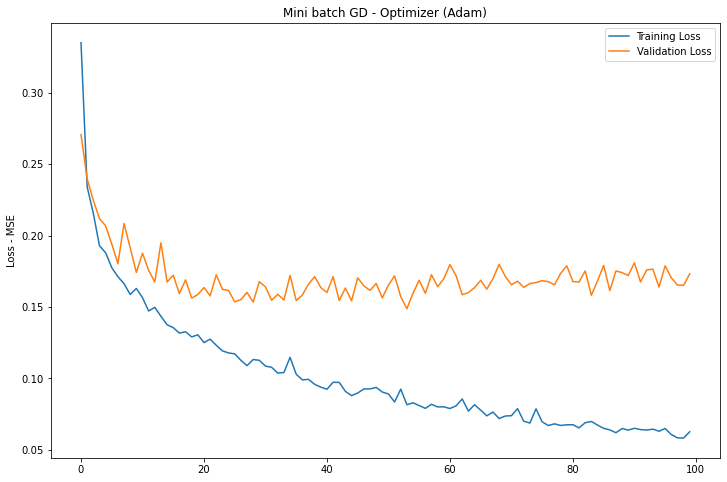

In [348]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylabel('Loss - MSE')
plt.title('Mini batch GD - Optimizer (Adam)')
plt.show()

In [349]:
train_loss =  model.evaluate(x_train,y_train, verbose = 0)
test_loss = model.evaluate(x_test, y_test, verbose = 0)

print(f'Training Loss is {train_loss:.4f}')
print(f'Testing Loss is {test_loss:.4f}')

Training Loss is 0.0806
Testing Loss is 0.1420


In [350]:
train_accuracy = r2_score(y_train, model.predict(x_train))
test_accuracy =  r2_score(y_test, model.predict(x_test))

print(f'Training Accuracy is {train_accuracy:.4f}')
print(f'Testing Accuracy is {test_accuracy:.4f}')

Training Accuracy is 0.9194
Testing Accuracy is 0.8577


# <font color='blue'> <center>  Section 6  -  Results
    
* The results of mean squared error and r_squared values for linear regression, polynomial regression and DL Neural Network for both the regions - rural as well as urban has been summarized in the table below :-
   

R2_score  =  1 -  RSS/TSS

In [391]:
results_rural  =  pd.DataFrame({'Linear_Regression': [0.2489,0.2858,0.7486,0.7225],
                         'Polynomial_Regression': [0.1099,0.1808,0.889,0.8244],
                          'Neural_Network': [0.0668,0.1235,0.9326,0.8801]
                        }, index= ['Training_mse', 'Testing_mse', 'Training_Score', 'Testing_Score'])

results_urban =  pd.DataFrame({'Linear Regression': [0.2533,0.3206,0.7338,0.7198],
                         'Polynomial Regression': [0.16,0.21,0.8319,0.8162],
                          'Neural Network': [0.0764,0.1768,0.9197,0.8455]
                        }, index= ['Training mse', 'Testing mse', 'Training_Score', 'Testing_Score'])

display(results_rural)

,Linear_Regression,Polynomial_Regression,Neural_Network
Training_mse,0.2489,0.1099,0.0668
Testing_mse,0.2858,0.1808,0.1235
Training_Score,0.7486,0.8890,0.9326
Testing_Score,0.7225,0.8244,0.8801


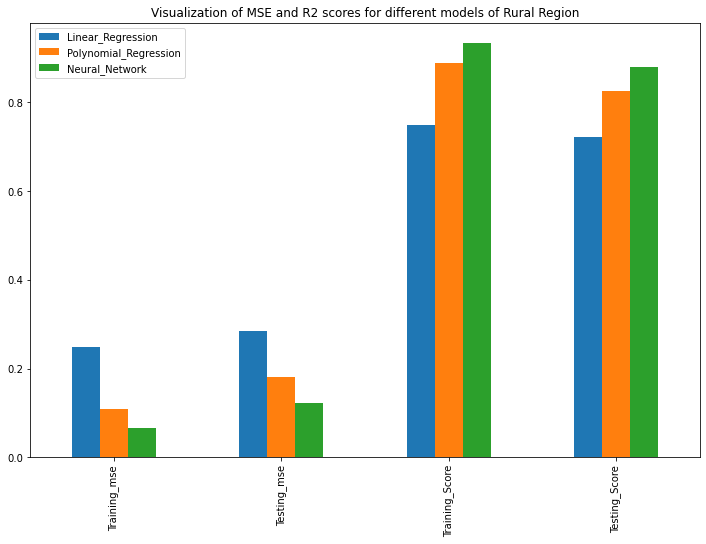

In [382]:
results_rural.plot(kind= 'bar', figsize=(12,8))
plt.title('Visualization of MSE and R2 scores for different models of Rural Region')
plt.show()

In [384]:
results_urban =  pd.DataFrame({'Linear Regression': [0.2533,0.3206,0.7338,0.7198],
                         'Polynomial Regression': [0.16,0.21,0.8319,0.8162],
                          'Neural Network': [0.0764,0.1768,0.9197,0.8455]
                        }, index= ['Training mse', 'Testing mse', 'Training_Score', 'Testing_Score'])

display(results_urban)

,Linear Regression,Polynomial Regression,Neural Network
Training mse,0.2533,0.1600,0.0764
Testing mse,0.3206,0.2100,0.1768
Training_Score,0.7338,0.8319,0.9197
Testing_Score,0.7198,0.8162,0.8455


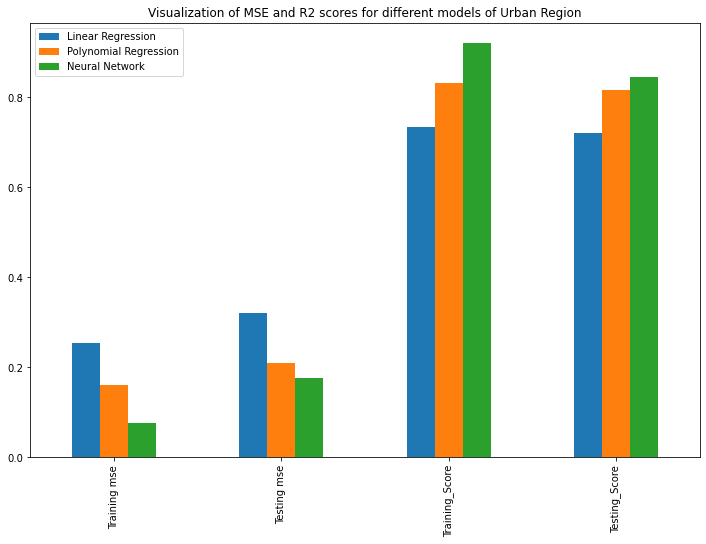

In [387]:
results_urban.plot(kind= 'bar', figsize=(12,8))
plt.legend(loc = 'upper left')
plt.title('Visualization of MSE and R2 scores for different models of Urban Region')
plt.show()

# Inference

* As we can see from the above visualizations, we have got the least mse for Neural Network followed by Polynomial Regression and then the highest value of mse is observed in case of linear regression.

* In case of r2 score, we have got the highest r2 score for Neural Networks followed by polynomial regressiona and least in case of linear regression.

## Future Scope of work

* Comparision of more optimizers - Nesterov, Adadelta , etc.
* Comparision with non traditional algorithms and more intelligent optimization techniques such as Bonobo optimizer
* Increasing the number of layers and making a more Deeper Regularized Architectures to prevent overfitting.

## References 

* Image Source  -  https://www.google.com/imgres?imgurl=https%3A%2F%2Fmedia.istockphoto.com%2Fphotos%2Faerial-view-of-bellevue-washington-picture-id875957442%3Fk%3D20%26m%3D875957442%26s%3D612x612%26w%3D0%26h%3DraQa46JkYyUIUjh8V7EYDymldOG5x740482bCNcZ2OQ%3D&imgrefurl=https%3A%2F%2Fwww.istockphoto.com%2Fphotos%2Fking-county-washington-state&tbnid=_6JIPd4CpKXMOM&vet=12ahUKEwjBp5qDguH4AhXRoukKHQt-AcEQMygHegUIARDLAQ..i&docid=UqWGsGBUrbUY9M&w=612&h=408&q=king%20county%20washington&ved=2ahUKEwjBp5qDguH4AhXRoukKHQt-AcEQMygHegUIARDLAQ

* Dataset - https://www.kaggle.com/datasets/shivachandel/kc-house-data

* Data preprocessing  -  
    * https://datascience.stackexchange.com/questions/tagged/pandas
    * https://www.analyticsvidhya.com/blog/2021/11/study-of-regularization-techniques-of-linear-model-and-its-roles/
* Information from Zipcodes  -  https://www.unitedstateszipcodes.org

* Information about median population density  -  https://www.stockingblue.com/article/1007/us-cities-by-population-density-of-urban-area/

* Regression Models -  https://scikit-learn.org/stable/modules/linear_model.html

* Neural Networks -   https://keras.io/guides/sequential_model/